# Lecture 5

First we'll load some data we'll use for illustration

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import time
import numpy.linalg as la
import math
%matplotlib inline


(-0.5, 59.5, 59.5, -0.5)

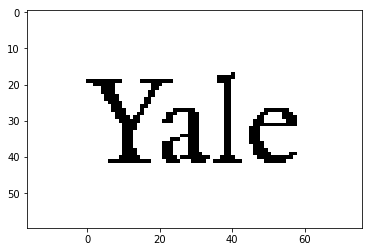

In [2]:
a=plt.imread("yale-blue.jpg")
A=np.mean(a,2)
A=A>120
A.shape
#plt.imshow(a)
%matplotlib inline
plt.imshow(A,cmap=plt.cm.gray)
plt.axis('equal')

We'll take the black pixels and think about them is points in 2-D space

In [3]:
data0=np.zeros((2,np.sum(~A)))
itercount=0
t0=time.time()
for j in range(A.shape[0]):
    for k in range(A.shape[1]):
        if (~A[j,k]):
            data0[:,itercount]=np.array([j,k])
            itercount+=1
print ("time using for loops:", time.time()-t0)
#datainit=data.copy()

time using for loops: 0.009498357772827148


Turns out there's a faster way to do this

In [4]:
t0=time.time()
## a faster more succinct way
datafast0=np.array(np.nonzero(~A))
print ("time using numpy:    ",time.time()-t0)

time using numpy:     0.00016450881958007812


In [5]:
print( np.sum(np.abs(datafast0-data0)) )

0.0


(15.794805099423261,
 42.205194900576736,
 -2.8579987707555765,
 59.85799877075557)

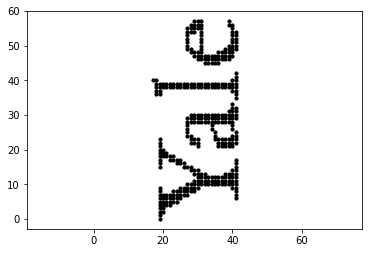

In [6]:
plt.scatter( data0[0,:], data0[1,:], 10, 'k' )
plt.axis('equal')

#### Let's swap the axes so it looks better

In [7]:
data1=data0.copy()
data1[0,:]=data0[1,:]
data1[1,:]=data0[0,:]

(-2.8551949005767403,
 59.855194900576734,
 15.792001229244425,
 42.207998770755566)

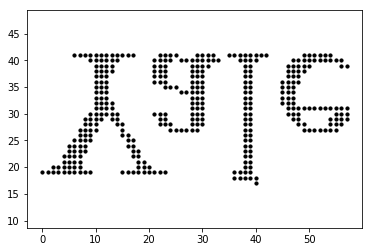

In [8]:
plt.scatter( data1[0,:], data1[1,:], 10, 'k' )
plt.axis('equal')

#### Almost.... And, actually, isn't todays' class about linear algebra?

(-2.8551949005767403,
 59.855194900576734,
 -42.20799877075557,
 -15.792001229244422)

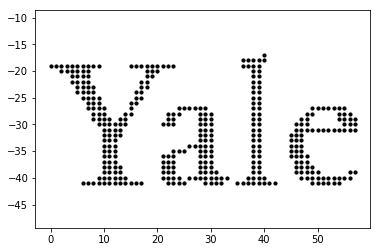

In [9]:
A=np.array([[0,1],[-1,0]])
data3 = A @ data0
plt.scatter( data3[0,:], data3[1,:], 10, 'k' )
plt.axis('equal')

#### Just for cnvenience I'll make it's non-negative numbers.

(-27.855194900576738,
 34.855194900576734,
 -11.207998770755577,
 15.207998770755573)

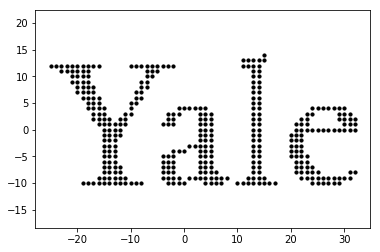

In [10]:
data = data3.copy()
#data[1,:] = data[1,:]-data[1,:].min()   #### THIS IS THE ORIGINAL CODE FROM THE FIRST CLASS. I CHANGED IT A BIT.
data = data-data.min(axis=1).reshape(-1,1)-np.array([[25],[10]])
plt.scatter( data[0,:], data[1,:] , 10, 'k')
plt.axis('equal')

#### let's put this into a plotting function

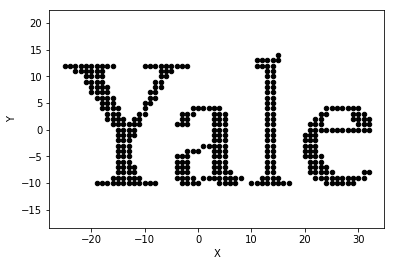

In [11]:
def myPlot2D( dat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter( dat[0,:], dat[1,:] ,20,'k')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.axis('equal')
    return fig

myPlot2D(data);

In [12]:
print(data.shape)

(2, 366)


### A Circle dataset

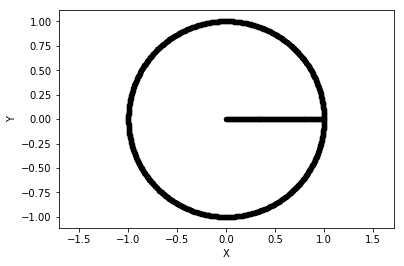

In [13]:
dataBindex = np.arange(0,2*math.pi,0.01)
dataB1 = np.array([np.cos(dataBindex),np.sin(dataBindex)])
dataB2 = np.zeros((2,100));dataB2[0,:]=np.array(np.arange(0,1,0.01))
dataB = np.concatenate((dataB1,dataB2),axis=1)
dataB.shape
myPlot2D(dataB);

### We'll make another dataset that is 3-D

In [14]:
A=np.array([[1,0],[0,1],[0,0]])
data3D = A @ data
 

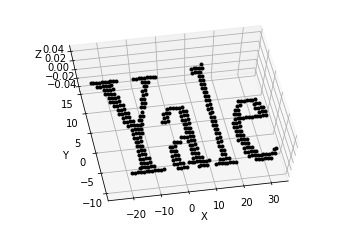

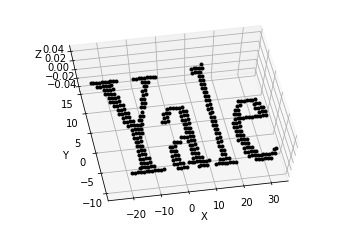

In [15]:
def myPlot3D( dat, elev = 70, azim=-100):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')    
    ax.plot3D(dat[0,:],dat[1,:],dat[2,:],'k.')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev, azim)
    ax.autoscale_view(tight=None, scalex=False, scaley=False, scalez=False)
    return fig

myPlot3D( data3D)

# Lecture 5: Vector Spaces and Hilbert Spaces (finite dimension) - Reminder

A vector space over the field $\mathbb{F}$ (in our case: real numbers $\mathbb{F}=\mathbb{R}$) is a set $\mathcal{V}$ (in our case: $\mathbb{R}^n$ together with two operations

- vector addition "+" $:\mathcal{V} \times \mathcal{V} \mapsto \mathcal{V}$ (if you add two vectors you get a vector)

- and scalar multiplication "$\cdot$" $:\mathbb{F} \times \mathcal{V} \mapsto \mathcal{V}$ (if you multiply a real number and a vector you get a vector).

The abstract description of vector spaces require these operations to satisfy certain axioms. We restrict our discussion to $\mathbb{R}^n$ and to the natural definition of addition and product, which naturally satisfy the axioms, so we will skip them for now. 

Vector spaces are much more general that the vectors in $\mathbb{R}^d$. I recommend courses like functional analysis to understand these interesting objects better!

When we have an inner product defined for the vector space, we call it a  *Hilbert space*. Most of what you will run into are Hilbert spaces.


#### comment about complex numbers

In most of this course we use real numbers. When complex numbers are involved a few things change slightly. 

In particular, $<v,u> = \overline{ <u,v> }$, and we have a conjugate transpose denoted by $A^H or A^*$. 

In the case of real numbers $<v,u> = { <u,v> }$ and $A^* = A^T$. But this isn't true for complex numbers!/

## Some Definitions

Let $u,v \in \mathbb{R}^{d}$ be non-zero vectors.
- $u$ is said to be called *normalized* if $<u,u> = \|u\|^2 = 1$.
- $u$ and $v$ are said to be *orthogonal* if $<u,v> = 0$.

Let ${B}$ be a set of non-zero vectors $u_1,u_2,...,u_n \in \mathbb{R}^{d}$.


- A linear combination of vectors in ${B}$ is a weighted sum:
$v = \sum_{i=1}^n a_i u_i$.

- ${B}$ is said to be orthonormal if each vector is normalized and each pair is orthogonal.

- ${B}$ is said to be linearly dependent if there is some set of coefficients, not all zeros, such that $\sum_{i=1}^n a_i u_i =0$. If such a set of coefficients does not exist, the set is called independent.

- The set of all the possible linear combinations of ${B}$ is called the  *span* of ${B}$ :

  $span({B}) = \left\{ \sum_{i=1}^n a_i u_i :  a_i \in \mathbb{R} \text{ for all } i\right\}$
  
  The span of ${B}$ is a linear space.

- If any element $v \in \mathcal{V}$ in a vector space can be written as a linear combination of elements of ${B}$, and ${B}$ is linearly independent,
  then ${B}$ is said to be a *basis* of $v \in \mathcal{V}$.
  


## Some Facts

If ${B}$ is a basis of $\mathcal{V}$, then each $v \in \mathcal{V}$ has a unique expansion in ${B}$. In other words, the coefficients $a_i$ in the following expression are unique:
\begin{equation}
  v = \sum_{i=1}^n a_i u_i,
\end{equation}
You can't write $v$ in any other way in this basis.


If ${B}$ and $\tilde{{B}}$ are both bases of $\mathcal{V}$,
then they have the same number of (nonzero) vectors in them.
We call this number of vectors the *dimension* of $\mathcal{V}$.


## Some examples


The following is the natural basis for all vectors in $\mathbb{R}^3$:


In [16]:
B1=np.identity(3)
print(B1)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


For reasons that will become clear later, we will mean that each column is one of the basis vectors.

Let's check some things...

In [17]:
j1=0
j2=1
print("norm of a vector: ", np.sqrt(B1[:,j1] @ B1[:,j1]))
print("inner product between different : ", B1[:,j1] @ B1[:,j2])

norm of a vector:  1.0
inner product between different :  0.0


We can write any vector
\begin{equation}
v= \sum_{i=1}^3 v[i] u_i = v[1]
 \begin{bmatrix}
1  \\
0  \\
0
\end{bmatrix} 
+v[2] 
 \begin{bmatrix}
0  \\
1  \\
0
\end{bmatrix} 
+v[3] 
 \begin{bmatrix}
0  \\
0  \\
1
 \end{bmatrix}.
\end{equation}

In [18]:
v=np.array([2.4,3.1,-7.1])
print("v   = ",v)
print("sum = ",v[0]*B1[:,0]+ v[1]*B1[:,1] + v[2]*B1[:,2])

v   =  [ 2.4  3.1 -7.1]
sum =  [ 2.4  3.1 -7.1]


#### This is also a basis of the same space,

But $B2$ it is not orthonormal.

In [19]:
B2=np.array([[1,0,0],[1,1,0],[0,0,1]])
print(B2)

[[1 0 0]
 [1 1 0]
 [0 0 1]]


In [20]:
j1=0
j2=1
print("norm of a vector: ", np.sqrt(B2[:,j1] @ B2[:,j1]))
print("inner product between different : ", B2[:,j1] @ B2[:,j2])

norm of a vector:  1.4142135623730951
inner product between different :  1


This is another orthogonal basis of the same space:

In [21]:
B3=np.array([[1,1,0],[1,-1,0],[0,0,1]])
print(B3)

[[ 1  1  0]
 [ 1 -1  0]
 [ 0  0  1]]


oooppsss... it's not normalized...

In [22]:
j1=0
j2=1
print("norm of a vector: ", np.sqrt(B3[:,j1] @ B3[:,j1]))
print("inner product between different : ", B3[:,j1] @ B3[:,j2])

norm of a vector:  1.4142135623730951
inner product between different :  0


In [23]:
B4=np.array([[1/np.sqrt(2),1/np.sqrt(2),0],[1/np.sqrt(2),-1/np.sqrt(2),0],[0,0,1]])
print(B4)

[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [24]:
j1=0
j2=1
print("norm of a vector: ", np.sqrt(B4[:,j1] @ B4[:,j1]))
print("inner product between different : ", B4[:,j1] @ B4[:,j2])

norm of a vector:  0.9999999999999999
inner product between different :  0.0


#### This is not a basis because the vectors are not independent

In [25]:
B5 = np.array([[1/np.sqrt(2),1,0],[1/np.sqrt(2),0,1],[0,0,0]])
print(B5)

[[0.70710678 1.         0.        ]
 [0.70710678 0.         1.        ]
 [0.         0.         0.        ]]


In [26]:
j1=0
print("norm of a vector: ", np.sqrt(B5[:,j1] @ B5[:,j1]))
j1=1
print("norm of a vector: ", np.sqrt(B5[:,j1] @ B5[:,j1]))
j1=2
print("norm of a vector: ", np.sqrt(B5[:,j1] @ B5[:,j1]))
print("linearly dependent: ", B5[:,0]*np.sqrt(2)-1*B5[:,1]-1*B5[:,2] )

norm of a vector:  0.9999999999999999
norm of a vector:  1.0
norm of a vector:  1.0
linearly dependent:  [0. 0. 0.]


### This is basis of a lower dimensional space, which is a subspace of our original space:


In [27]:
B6=np.array([[1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)],[0,0]])
print(B6)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]
 [ 0.          0.        ]]


In [28]:
j1=0
j2=1
print("norm of a vector: ", np.sqrt(B6[:,j1] @ B6[:,j1]))
print("inner product between different : ", B6[:,j1] @ B6[:,j2])

norm of a vector:  0.9999999999999999
inner product between different :  0.0


## Why Orthonormal Bases

Orthonormal bases are particularly convenient to work with. In fact, when we say "basis" we often mean "orthonormal basis."
If $B=\{ v_1, ..., v_n \}$ is an *orthonormal* basis of $\mathcal{V}$, and $\mathcal{V}$, and $a_i$ are the coefficients in the expansion

\begin{equation}
v = \sum_{j=1}^n a_i v_i ,
\end{equation}

then 

\begin{equation}
a_i = <v,v_i>.
\end{equation}

Why is that true?

\begin{equation}
<v,v_i> = <\sum_{j=1}^n a_j v_j , v_i> =
\end{equation}

by linearity

\begin{equation}
= \sum_{j=1}^n a_j <v_j , v_i > =
\end{equation}

and since $B$ is an orthonormal basis, $<v_j , v_i> =0$, unless $i=j$, where $<v_j , v_j> =1$:

\begin{equation}
= a_i
\end{equation}


#### Let's try this:

In [29]:
v=np.array([2.4,3.1,-7.1])
tmpB = B1
print("v   = ",v)
print(B1)
a0 = v@tmpB[:,0]
a1 = v@tmpB[:,1] 
a2 = v@tmpB[:,2]
print("coefficients = ",a0,a1,a2)
print("sum = ", a0*tmpB[:,0] + a1*tmpB[:,1] + a2*tmpB[:,2])

v   =  [ 2.4  3.1 -7.1]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
coefficients =  2.4 3.1 -7.1
sum =  [ 2.4  3.1 -7.1]


#### Another orthonormal basis

In [30]:
v=np.array([2.4,3.1,-7.1])
tmpB = B4
print("v   = ",v)
print(tmpB)

a0 = v@tmpB[:,0]
a1 = v@tmpB[:,1] 
a2 = v@tmpB[:,2]
print("coefficients = ",a0,a1,a2)
print("sum = ", a0*tmpB[:,0] + a1*tmpB[:,1] + a2*tmpB[:,2])

v   =  [ 2.4  3.1 -7.1]
[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]
coefficients =  3.889087296526011 -0.4949747468305832 -7.1
sum =  [ 2.4  3.1 -7.1]


#### Not orthonormal

In [31]:
v=np.array([2.4,3.1,-7.1])
tmpB = B2
print("v   = ",v)
print(tmpB)

a0 = v@tmpB[:,0]
a1 = v@tmpB[:,1] 
a2 = v@tmpB[:,2]
print("coefficients = ",a0,a1,a2)
print("sum = ", a0*tmpB[:,0] + a1*tmpB[:,1] + a2*tmpB[:,2])

v   =  [ 2.4  3.1 -7.1]
[[1 0 0]
 [1 1 0]
 [0 0 1]]
coefficients =  5.5 3.1 -7.1
sum =  [ 5.5  8.6 -7.1]


## Another way to write this

\begin{equation}
v = \sum_{j=1}^n a_i v_i ,
\end{equation}

Assuming an **orthonormal basis**:

Coefficient:

\begin{equation}
    a_j = <v,v_j> = v_j^* v
\end{equation}

Vector of coefficients:

\begin{equation}
    a = (B^* v)
\end{equation}

Then 

\begin{equation}
    v = B a
\end{equation}


##### comment: since we use real numbers, we'll use $B^*$, $B^\intercal$ and $B^H$ interchangeably.


In [32]:
v=np.array([2.4,3.1,-7.1])
tmpB = B4
print("v   = ",v)
print(tmpB)

a0 = v@tmpB[:,0]
a1 = v@tmpB[:,1] 
a2 = v@tmpB[:,2]
a = tmpB.T @ v
print("coefficients = ",a0,a1,a2)
print("coeeficients = ", a)
print("reconstruction = ", tmpB @ a)

v   =  [ 2.4  3.1 -7.1]
[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]
coefficients =  3.889087296526011 -0.4949747468305832 -7.1
coeeficients =  [ 3.8890873  -0.49497475 -7.1       ]
reconstruction =  [ 2.4  3.1 -7.1]


So... what you're saying is....

\begin{equation}
    v = B a = B B^* v 
\end{equation}

So... 
\begin{equation}
    B B^* = I ?
\end{equation}

Yes! which leads us to the next topic...


## Unitary Matrices

A Unitary matrix is a square matrix which satisfies $U^* U = U U^* = I$.

An orthonormal matrix is a square matrix which satisfies $U^\intercal U = U U^\intercal = I$. Since we are looking at real numbers in most of this course, these are usually the same as Unitary matrices.

Cool fact about our orthonormal bases, the way we wrote them, they are unitary matrices!


In [33]:
print(B1)
print( B1 @ B1.T )
print( B1.T @ B1)
# not very surprising... 


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
print(B4)
print( B4 @ B4.T )
print( B4.T @ B4)

[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[[ 1.00000000e+00 -2.23711432e-17  0.00000000e+00]
 [-2.23711432e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 1.00000000e+00 -2.23711432e-17  0.00000000e+00]
 [-2.23711432e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


This makes sense. The columns of unitary matrices must satisfy:

\begin{equation}
 <B[:,j], B[:,j]> = 1
 \end{equation}
 
 and for $i \neq j$: 
 
\begin{equation}
 <B[:,j], B[:,i]> = 0
 \end{equation}

## Linear operators and bases


### Easy linear operator: diagonal

if $A$ is **diagonal**,

\begin{equation}
  (A v)[i] = \sum_j A[i,j] v[j] = A[i,i] v[i]
\end{equation}


In [35]:
v = np.array([1,10])
A = np.diag([-1,0.33])
print("v=",v)
print("A=",A)
print("Av=",A@v)

v= [ 1 10]
A= [[-1.    0.  ]
 [ 0.    0.33]]
Av= [-1.   3.3]


### General linear operators and bases

One of the nice things about basis is that they tell us everything we need to know about ANY linear operator:

\begin{equation}
  A v = A \left(\sum_{i=1}^n a_i v_i\right) =
\end{equation}

by linearity:

\begin{equation}
  =  \sum_{i=1}^n a_i \left(A v_i\right).
\end{equation}


Let's put together the result of this section and the previous section:

\begin{equation}
  A v = \sum_{i=1}^n a_i \left(A v_i\right) = \sum_{i=1}^n <v,v_i> \left(A v_i\right) = \sum_{i=1}^n v_i^* v \left(A v_i\right) = \sum_{i=1}^n \left(A v_i\right) v_i^* v =
\left(\sum_{i=1}^n \left(A v_i\right) v_i^* \right) v
\end{equation}

In other words, the matrix $A$ can be written as:

\begin{equation}
  A = \left(\sum_{i=1}^n \left(A v_i\right) v_i^* \right).
\end{equation}

Note that $\left(A v_i\right) $ is a column vector,
$ v_i^* $ is a row vector,
and $\left(A v_i\right) v_i^* $ is a matrix.
$\left(A v_i\right) v_i^* $ happens to be a rank 1 matrix, but we won't discuss this in detail.
But, this tells us that $A$ can be written as a sum of these rank 1 matrices.



In [36]:
np.random.seed(1234)
A = np.random.randn(3,3)

#### One perspective: What does the the matrix do to each basis vector:

\begin{equation}
  A v = \sum_{i=1}^n a_i \left(A v_i\right) = \sum_{i=1}^n <v,v_i> \left(A v_i\right) 
\end{equation}


In [37]:
v=np.array([2.4,3.1,-7.1])
tmpB = B4 # one of our orthonormal bases
print("v   = ",v)
print(tmpB)

v   =  [ 2.4  3.1 -7.1]
[[ 0.70710678  0.70710678  0.        ]
 [ 0.70710678 -0.70710678  0.        ]
 [ 0.          0.          1.        ]]


In [38]:
a0 = tmpB[:,0].T @ v
a1 = tmpB[:,1].T @ v
a2 = tmpB[:,2].T @ v

testAv = a0 * A @ tmpB[:,0] + a1 * A @ tmpB[:,1] + a2 * A @ tmpB[:,2]

print("Av = ",testAv )
print("diff = ", testAv - A@v)
print("relative error= ", np.linalg.norm(testAv - A@v)/np.linalg.norm(A@v) )

Av =  [-12.73279974  -9.2830465   -0.02165491]
diff =  [1.77635684e-15 0.00000000e+00 4.44089210e-16]
relative error=  1.1620014307080153e-16


#### Another perspective: the matrix as a sum of rank 1 matrices

\begin{equation}
  A = \left(\sum_{i=1}^n \left(A v_i\right) v_i^* \right).
\end{equation}



In [39]:
# How do we do this?

In [40]:
(A@tmpB[:,0]).reshape(-1,1) @ (tmpB[:,0].reshape(-1,1).T)

array([[-0.35977027, -0.35977027,  0.        ],
       [-0.51662031, -0.51662031,  0.        ],
       [ 0.11153245,  0.11153245,  0.        ]])

In [41]:
np.outer(A@tmpB[:,0] , tmpB[:,0].T)

array([[-0.35977027, -0.35977027, -0.        ],
       [-0.51662031, -0.51662031, -0.        ],
       [ 0.11153245,  0.11153245,  0.        ]])

In [42]:
np.outer(A@tmpB[:,0] , tmpB[:,0].T)+np.outer(A@tmpB[:,1] , tmpB[:,1].T)+np.outer(A@tmpB[:,2] , tmpB[:,2].T) - A

array([[ 0.00000000e+00,  2.22044605e-16,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  1.11022302e-16,  0.00000000e+00]])

### What does a matrix do to data? We'll try to interpret this as we go...

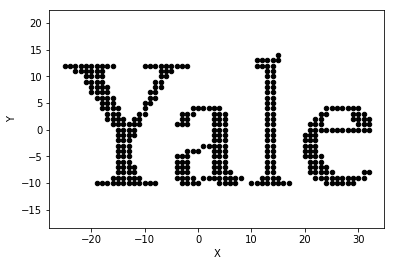

In [43]:
# remember these points?
myPlot2D( data )
plt.show()

#### Arbitrary matrix

[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]]


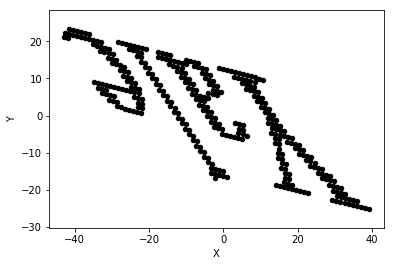

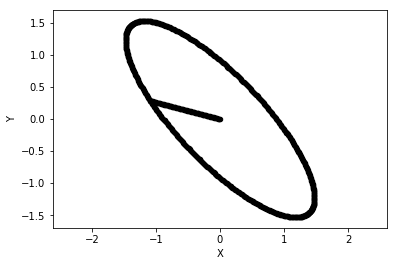

In [44]:
np.random.seed(123)
A = np.random.randn(2,2)
print(A)
myPlot2D( A@data)
plt.show()

myPlot2D( A@dataB)
plt.show()

### Diagonal matrix

[[3 0]
 [0 1]]


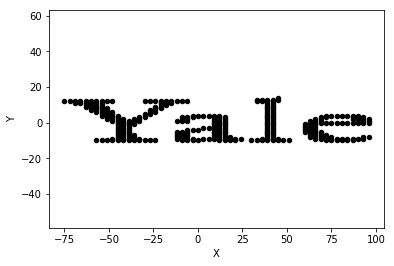

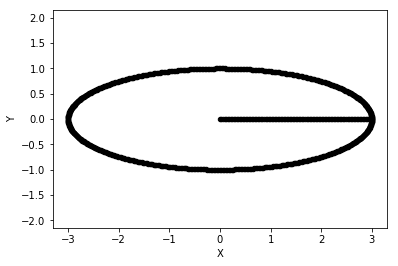

In [45]:
Adiag = np.array([[3,0],[0,1]])
print(Adiag)
myPlot2D( Adiag@data)
plt.show()
myPlot2D( Adiag@dataB)
plt.show()

[[ 1  0]
 [ 0 -1]]


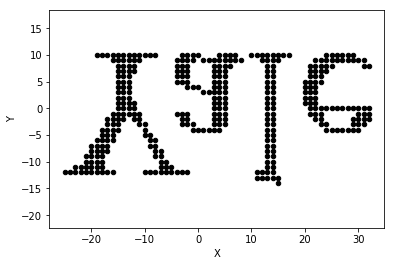

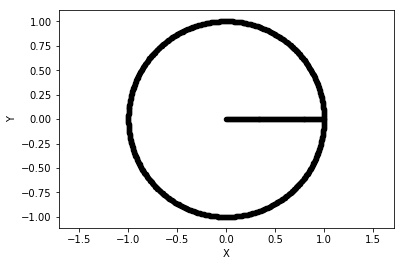

In [46]:
Adiag2 = np.array([[1,0],[0,-1]])
print(Adiag2)
myPlot2D( Adiag2@data)
plt.show()
myPlot2D( Adiag2@dataB)
plt.show()

#### What does a unitary matrix do?

[[ 1.00000000e+00 -1.26599665e-17]
 [-1.26599665e-17  1.00000000e+00]]
[[ 0.80901699  0.58778525]
 [-0.58778525  0.80901699]]


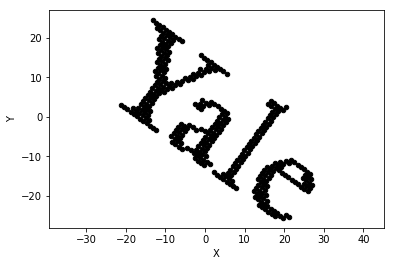

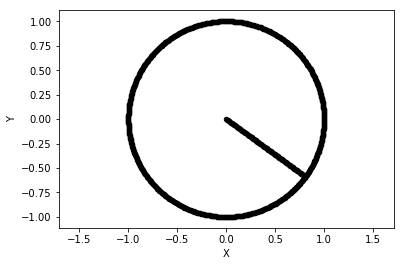

In [47]:
tt=math.pi * 0.2
Aunitary = np.array([[math.cos(tt),math.sin(tt)],[-math.sin(tt),math.cos(tt)]])
print(Aunitary@Aunitary.T) # check that it's unitray
print(Aunitary)
myPlot2D( Aunitary@data)
plt.show()
myPlot2D( Aunitary@dataB)
plt.show()

#### rotate and stretch

[[ 2.42705098  1.76335576]
 [-0.58778525  0.80901699]]


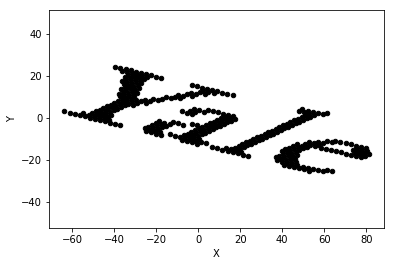

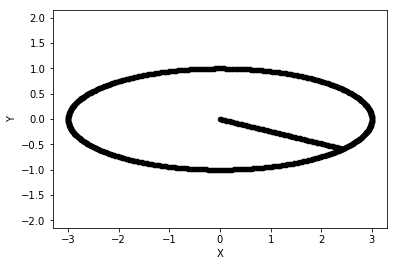

In [48]:
A =Adiag @ Aunitary 
print(A)
myPlot2D( A@data)
plt.show()
myPlot2D( A@dataB)
plt.show()

#### stretch and rotate

[[ 2.42705098  0.58778525]
 [-1.76335576  0.80901699]]


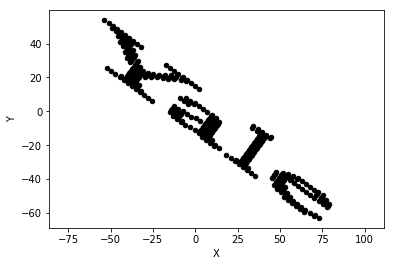

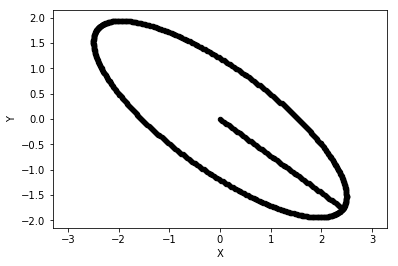

In [49]:
A = Aunitary @ Adiag
print(A)
myPlot2D( A@data)
plt.show()
myPlot2D( A@dataB)
plt.show()

#### rotate, stretch and rotate BACK

[[ 2.30901699 -0.95105652]
 [-0.95105652  1.69098301]]


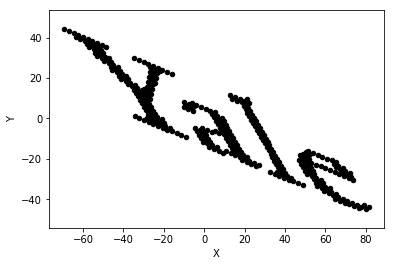

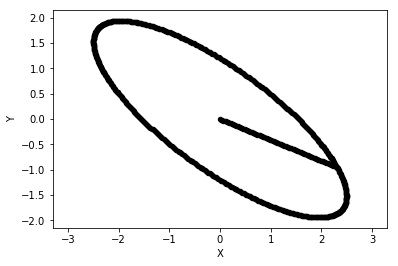

In [50]:
A = Aunitary @ Adiag @ la.inv(Aunitary)
print(A)
myPlot2D( A@data)
plt.show()
myPlot2D( A@dataB)
plt.show()

[[2.30901699 0.95105652]
 [0.95105652 1.69098301]]


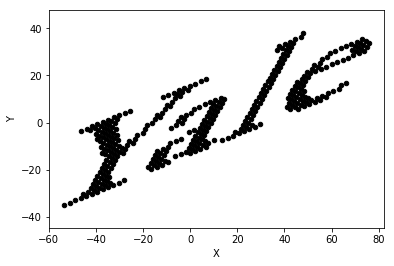

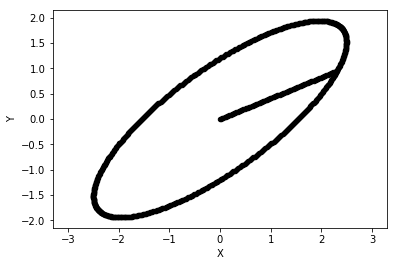

In [51]:
# or this, which isn't the same
A = la.inv(Aunitary) @ Adiag @ Aunitary
print(A)
myPlot2D( A@data)
plt.show()
myPlot2D( A@dataB)
plt.show()

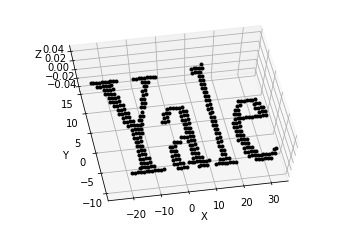

In [52]:
# remember these points?
myPlot3D( data3D, elev = 70, azim=-100)
plt.show()

[[3 0 0]
 [0 1 0]
 [0 0 1]]


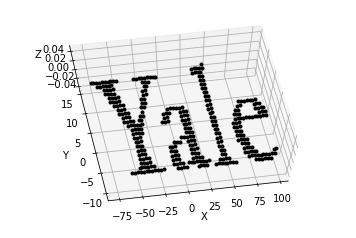

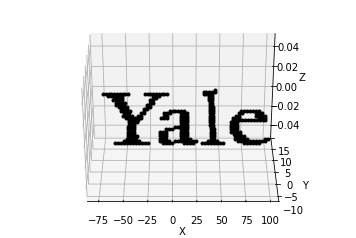

In [53]:
A = np.array([[3,0,0],[0,1,0],[0,0,1]])
print(A)
myPlot3D( A@data3D, elev = 70, azim=-100)
plt.show()

myPlot3D( A@data3D, elev = 30, azim=-90)
plt.show()

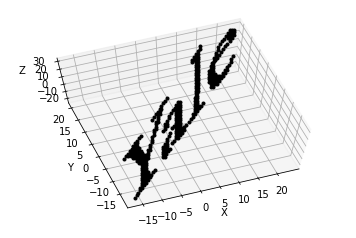

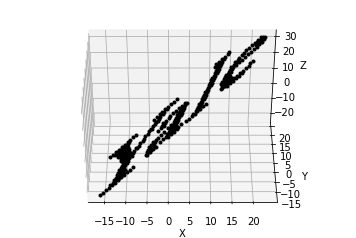

In [54]:
np.random.seed(123)
A = np.random.rand(3,3)
myPlot3D( A@data3D, elev = 70, azim=-110)
plt.show()
myPlot3D( A@data3D, elev = 40, azim=-90)
plt.show()

### What is the value of a matrix element?

Suppose we have a linear operator, and we want to know the value of the matrix element. How do we write this in linear algebra notation?

Recall our "natural" basis $B_1$: 

In [55]:
tmpB=B1
print(tmpB)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


The matrix element $i,j$ relates the $j$ element of the input to the $i$ element of the output. 

\begin{equation}
Av[i] = \sum_j A[i,j] v[j]
\end{equation}

To see this, let's take a vector that be all zeros, except for $1$ in the $j$-th position:

In [56]:
i=1
j=2
print("vector e_j: ", tmpB[:,j]) 
print("A e_j:", A@tmpB[:,j])
print("A :", A)

vector e_j:  [0. 0. 1.]
A e_j: [0.22685145 0.42310646 0.4809319 ]
A : [[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]
 [0.9807642  0.68482974 0.4809319 ]]


Therefore, the $i,j$ element is:

\begin{equation}
A[i,j] = e_i^\intercal A e_j
\end{equation}


In [57]:
print("vector e_j: ", tmpB[:,j]) 
print("vector e_i: ", tmpB[:,i]) 
print("e_i^T A e_j:", tmpB[:,i].T @ A @tmpB[:,j]) # Does it matter that I took a transpose?
print("A[i,j] :", A[i,j])

vector e_j:  [0. 0. 1.]
vector e_i:  [0. 1. 0.]
e_i^T A e_j: 0.42310646012446096
A[i,j] : 0.42310646012446096


# Eigen decomposition

A vector $v$ is called an eigenvector of the square matrix $A$ with eigenvalue $\lambda$ is

\begin{equation}
Av = \lambda v
\end{equation}


In [58]:
# "easy" eigenvector:
A = np.array([[2,0,0],[0,1,0],[0,0,-1]])
v = np.array([1,0,0])
print("A=",A)
print("v=",v)
print("Av=",A@v)
print("2 v=",2 * v)


A= [[ 2  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
v= [1 0 0]
Av= [2 0 0]
2 v= [2 0 0]


In [59]:
# something more interesting:
np.random.seed(123)
A = np.random.randn(3,3)
print(A)

[[-1.0856306   0.99734545  0.2829785 ]
 [-1.50629471 -0.57860025  1.65143654]
 [-2.42667924 -0.42891263  1.26593626]]


In [60]:
DD, BB = la.eig(A)
# eigenvalues and eigenvectors can be complex!
print(DD)

[ 0.33539593+1.42242617j  0.33539593-1.42242617j -1.06908645+0.j        ]


In [61]:
print (A @ BB[:,0] )
print (A @ BB[:,0] - DD[0]*BB[:,0])
print ("norm of difference:", la.norm(A @ BB[:,0] - DD[0]*BB[:,0]))

[0.56128137+0.11765871j 0.56651061+0.69077638j 0.23050555+0.97758233j]
[-1.11022302e-16-5.96744876e-16j -2.22044605e-16-6.66133815e-16j
 -2.49800181e-16-3.33066907e-16j]
norm of difference: 1.0172522593335745e-15


In [62]:
# eigenvectors do not necessarily form an orthonormal basis
print( BB @ np.matrix(BB).H) # H is conjugate transpose. It's implemented only for matrices in numpy.

print( BB @ BB.T)

[[0.79544734+0.00000000e+00j 0.24492935-9.53202200e-18j
  0.71178872+1.16728646e-17j]
 [0.24492935+9.53202200e-18j 0.78146806+0.00000000e+00j
  0.62690735-5.78256522e-18j]
 [0.71178872-1.16728646e-17j 0.62690735+5.78256522e-18j
  1.4230846 +0.00000000e+00j]]
[[ 0.29039641-4.75140242e-18j -0.13715078-1.58545045e-17j
   0.71178872+1.16728646e-17j]
 [-0.13715078-1.58545045e-17j  0.49241757+7.00958681e-18j
   0.62690735-5.78256522e-18j]
 [ 0.71178872+1.16728646e-17j  0.62690735-5.78256522e-18j
   1.4230846 +0.00000000e+00j]]


Eigen decomposition:

\begin{equation}
A = Q D Q^{-1}
\end{equation}

Where $Q$ is a matrix of eigenvectors, and $D$ is diagonal


In [63]:
print( BB @ np.diag(DD) @ la.inv(BB) - A)

[[-1.77635684e-15+3.13003099e-17j -4.44089210e-16-4.25071560e-17j
   7.77156117e-16-7.09478239e-17j]
 [-2.44249065e-15-1.76782788e-16j -3.33066907e-16-2.80185839e-16j
   1.33226763e-15+6.11318075e-17j]
 [-1.33226763e-15-1.30584019e-16j -4.99600361e-16-3.13837503e-16j
   8.88178420e-16+3.06121660e-17j]]


#### Some matrices do not have an eigenvalue decomposition...

In [64]:
A = np.array([[1,1],[0,1]])
DD, BB = la.eig(A)
print( BB @ np.diag(DD) @ la.inv(BB) - A)  # that didn't really work....

[[ 0. -1.]
 [ 0.  0.]]


In [65]:
#A = np.array([[1,1],[0,1]])+0.0001*np.random.randn(2,2)
#DD, BB = la.eig(A)
#print( BB @ np.diag(DD) @ la.inv(BB) - A)  # that didn't really work....

In [66]:
# why?
print(BB)
print(la.inv(BB))

[[ 1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  2.22044605e-16]]
[[1.00000000e+00 4.50359963e+15]
 [0.00000000e+00 4.50359963e+15]]


### Eigendecomposition of symmetric matrics

In [67]:
np.random.seed(123)
A = np.random.randn(3,3)
A = (A+A.T)/2
print(A)

[[-1.0856306  -0.25447463 -1.07185037]
 [-0.25447463 -0.57860025  0.61126195]
 [-1.07185037  0.61126195  1.26593626]]


In [68]:
# eigenvalues are real numbers. The can be negative.
DD, BB = la.eig(A)
print(DD)

[ 1.86077998 -1.50120854 -0.75786603]


In [69]:
# eigenvectors form an orthonormal basis
print( BB @ np.matrix(BB).H) # H is conjugate transpose. It's implemented only for matrices in numpy.

print( BB @ BB.T) # even this worked...

[[ 1.00000000e+00  0.00000000e+00 -3.43475248e-16]
 [ 0.00000000e+00  1.00000000e+00  2.77555756e-17]
 [-3.43475248e-16  2.77555756e-17  1.00000000e+00]]
[[ 1.00000000e+00  0.00000000e+00 -3.43475248e-16]
 [ 0.00000000e+00  1.00000000e+00  2.77555756e-17]
 [-3.43475248e-16  2.77555756e-17  1.00000000e+00]]


### Eigendecomposition, rotating and stretching (symmetric matrices)

Haven't we seen this expression before?

\begin{equation}
A = Q D Q^{-1}
\end{equation}

We had the something very similar when we were investigating unitary matrices. 

\begin{equation}
A = U D U^{-1} = U D U^*
\end{equation}

[[ 2.30901699 -0.95105652]
 [-0.95105652  1.69098301]]


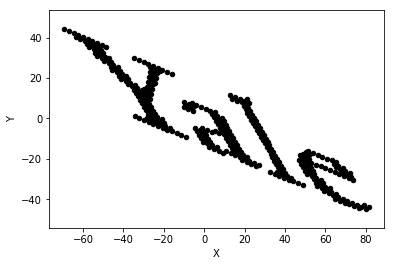

In [70]:
A = Aunitary @ Adiag @ la.inv(Aunitary)
print(A)
myPlot2D( A@data)
plt.show()

In [71]:
# is A symmetric?
print(A-A.T)

[[0. 0.]
 [0. 0.]]


In [72]:
DD, BB = la.eig(A)

In [73]:
# what are the eigenvalues?
# they are the stretching factors!
print(Adiag)
print(DD)


[[3 0]
 [0 1]]
[3. 1.]


In [74]:
# What is the unitary matrix?
print(Aunitary)
print(BB)

[[ 0.80901699  0.58778525]
 [-0.58778525  0.80901699]]
[[ 0.80901699  0.58778525]
 [-0.58778525  0.80901699]]


#### comment: the orders and signs can change

In [75]:
A = Aunitary.T @ np.diag([3,-1]) @ Aunitary
DD, BB = la.eig(A)
print(DD) # didn't change on my computer, but can change

[ 3. -1.]


In [76]:
# What is the unitary matrix?
print(Aunitary)
print(BB)

[[ 0.80901699  0.58778525]
 [-0.58778525  0.80901699]]
[[ 0.80901699 -0.58778525]
 [ 0.58778525  0.80901699]]


## In other words, a symmetric matrix is simply: rotate, stretch in rotated basis, rotate back

In [77]:
DD,BB = la.eig(Aunitary)
print(DD)
print(np.abs(DD))

[0.80901699+0.58778525j 0.80901699-0.58778525j]
[1. 1.]


# Orthogonal Projection

An *orthogonal projection* is a linear operator $P: \mathcal{V} \mapsto \mathcal{V}$ such that

\begin{equation}
  P= P^2 = P^\intercal .
\end{equation}

In other words, it is a square matrix such that for any vector $v \in \mathbb{R}^d$

\begin{equation}
  P v= P P v = P^\intercal v .
\end{equation}

Fact: the vectors projected from a vector space $\mathcal{V}$ by the orthogonal projection $P$ give us a vector space $\mathcal{U} \subseteq \mathcal{V}$.

and
$dim(\mathcal{U}) \leq dim(\mathcal{V})$. 

Fact: suppose $n = dim(\mathcal{V})$ and $k= dim(\mathcal{U})$. Then,
- $k \leq n$.
- There exists some basis $B=\{v_1,...,v_n\}$ of $\mathcal{V}$ such that
  $\tilde{B}=\{v_1,...,v_{\bf{k}}\}$ is a basis of $\mathcal{V}$.


#### Remark: The term "projection'' is commonly abused in many ways.
Generally, when we say "projection" we will mean "orthogonal projection."
Later in the course we will abuse the term further. 


#### Examples of orthogonal projection matrices:

\begin{equation}
{\tilde{B}}= 
 \begin{bmatrix}
1 & 0  \\
0 & 0
\end{bmatrix} 
 ,
 \begin{bmatrix}
1 & 0  \\
0 & 0
\end{bmatrix} 
 .
\end{equation}
We will see more of these soon.


#### Example of projection matrices (satisfies $P= P^2$)  that are not orthogonal projection matrices 

(does not satisfy satisfy $P= P^\intercal$):

\begin{equation}
{\tilde{B}}= 
 \begin{bmatrix}
1 & 1  \\
0 & 0
\end{bmatrix} 
 .
\end{equation}

In [78]:
P = np.array([[1,1],[0,0]])
print("P=",P)
print("P@P=",P@P)

P= [[1 1]
 [0 0]]
P@P= [[1 1]
 [0 0]]


# Change of basis

We can write a vector in different bases

\begin{equation}
v = \sum_i a_i v_i = \sum_i b_i u_i
\end{equation}

For simplicity, we assume orthonormal bases. 

## Swapping bases: 

Let's assume that we have two bases that are columns of unitary matrics.
Writing in matrix notation:

\begin{equation}
v = \sum_i a_i v_i = V a 
\end{equation}

Adding the identity doesn't do anything, right?

\begin{equation}
v = I V a 
\end{equation}

And we know that $U U^* = I$:

\begin{equation}
v = U U^* V a = U U^* v
\end{equation}

So, $U^* v$ gives us the expansion in the basis, and $U^* V$ translates between the expansion in $V$ to the expansion in $U$. 


In [79]:
# we will soon see why this produces unitary matrics
np.random.seed(123)
U,D,V = la.svd(np.random.randn(3,3))
v = np.random.randn(3)
# are these unitary matrices?
print(U.T @ U)
print(V.T @ V)

[[ 1.00000000e+00  2.00877382e-16 -2.29038596e-17]
 [ 2.00877382e-16  1.00000000e+00  1.65292374e-16]
 [-2.29038596e-17  1.65292374e-16  1.00000000e+00]]
[[ 1.00000000e+00 -1.14313585e-16 -5.71327434e-17]
 [-1.14313585e-16  1.00000000e+00 -7.18404598e-17]
 [-5.71327434e-17 -7.18404598e-17  1.00000000e+00]]


In [80]:
print(v)
a = V.T @ v
print("a=",a)
print("reconstruct from a=",V@a)
b = U.T @ v
print("b=",b)
print("reconstruct from b=",U@b)
print("translate from a to b:", U.T @ V @ a)

[-0.8667404  -0.67888615 -0.09470897]
a= [-0.446168   -0.66243445  0.76368176]
reconstruct from a= [-0.8667404  -0.67888615 -0.09470897]
b= [ 0.70577429 -0.51037621  0.68006904]
reconstruct from b= [-0.8667404  -0.67888615 -0.09470897]
translate from a to b: [ 0.70577429 -0.51037621  0.68006904]


## Matrices elements in different bases (*)

The same idea applies to matrices.

Suppose again that we have bases that are the columns of unitary matrices

\begin{equation}
v = \sum_i a_i v_i = V a
\end{equation}

Suppose that $w= A v$ and that $\alpha$ is the expansion coefficients of $w$

\begin{equation}
w= A v = \sum_i \alpha_i v_i = V \alpha
\end{equation}

Then,

\begin{equation}
\alpha = V^* w= V^* A v = V^* A V V^* v = V^* A V a
\end{equation}

If we now call $B = V^* A V$, we have 

\begin{equation}
\alpha = B a
\end{equation}

In other words, the matrix $B = V^* A V$ is the the matrix A in a new basis.



In [81]:
A = np.random.randn(3,3)
w = A @ v
a = V.T @ v
alpha = V.T @ w
B = V.T @ A @ V

print( alpha )
print( B @ a )

[ 0.31788831 -0.74891871  1.79301943]
[ 0.31788831 -0.74891871  1.79301943]


#### The nice thing about this is that we can compute anything we want in any basis we want!

In our example, we can get $w$ using operations in the V basis, and get $w$ back through the expression $w=V \alpha$:

In [82]:
a = V.T @ v
alpha = B @ a
testw = V @ alpha
print( w )
print( testw )

[-0.81685685 -1.32821384 -1.2022661 ]
[-0.81685685 -1.32821384 -1.2022661 ]


#### Why bother?

Recall the eigen decomposition of a *symmetric* matrix A. There exist $D$ diagonal $V$ unitary such that 

\begin{equation}
    A = V D V^*.
\end{equation}

So, we can do all the operations with a diagonal matrix!!!

In [83]:
A = np.random.randn(3,3)
A = (A+A.T)/2
D,V = la.eig(A)

#A=np.matrix(A)
#V=np.matrix(V)
#v=np.matrix(v.reshape(-1,1))

a = V.T @ v
B = V.T @ A @ V

print(B)
print(D)

[[ 1.97848453e+00 -3.88578059e-16  2.91433544e-16]
 [-3.53883589e-16 -6.72541618e-01  2.77555756e-16]
 [ 2.91433544e-16  2.22044605e-16 -1.31471728e+00]]
[ 1.97848453 -0.67254162 -1.31471728]


In [84]:
a = V.T @ v
alpha = B @ a
testw = V @ alpha
print( A@v )
print( testw )

[-0.53682058  1.34559508 -0.06917093]
[-0.53682058  1.34559508 -0.06917093]


# Lower dimensional bases

The columns of unitary matrices give us bases. A $d \times d$ unitary matrix will have $d$ basis vectors, so it will give us a basis for a $d$ dimensional space. What about lower dimensional spaces?

In [85]:
np.random.seed(123)
# we'll see later why these are unitary matrices
U,D,V = la.svd(np.random.randn(3,3)) 
#let's take two of the columns. These are an arbitrary basis of dimension 2
U = U[:,:2]
print(U)

[[-0.25630788  0.91016346]
 [-0.60748906 -0.41356061]
 [-0.75183995  0.02387674]]


In [86]:
# check that this is a basis:
print(la.norm(U[:,0])) # normalized?
print(la.norm(U[:,1])) # normalized?
print(U[:,0] @ U[:,1]) # inner product 0?

1.0
1.0
1.8735013540549517e-16


In [87]:
# in other words
print(U.T @ U) # Identity matrix 2x2

[[1.00000000e+00 2.00877382e-16]
 [2.00877382e-16 1.00000000e+00]]


In [88]:
# what about...
print(U @ U.T) # ah.... not identity matrix

[[ 0.89409125 -0.22070353  0.21443424]
 [-0.22070353  0.54007534  0.44686007]
 [ 0.21443424  0.44686007  0.56583341]]


However, it is easy to see that $P=U U^*$ is a projection:

\begin{equation}
    P P = U U^* U U^* = U I_{\text{2 dim identity}} U^* = U U^*
\end{equation}



In [89]:
P = U @ U.T
print(P@P - P)

[[-1.11022302e-16 -8.32667268e-17 -1.38777878e-16]
 [-8.32667268e-17  1.11022302e-16  0.00000000e+00]
 [-1.38777878e-16  0.00000000e+00 -1.11022302e-16]]


### expand in this basis?

In [90]:
a = U.T @ v
print(a)
print("v=             ",v)
print("reconstruction=",U @a , "    - doesn't work!")


[ 0.70577429 -0.51037621]
v=              [-0.8667404  -0.67888615 -0.09470897]
reconstruction= [-0.64542129 -0.21767866 -0.54281543]     - doesn't work!


In [91]:
# Only works is v is in the span of U. We can get a vector in the span of U using projection
v2 = P@v
a2 = U.T @ v2
print(a2)
print("v2=            ",v2)
print("reconstruction=",U @a2 , "    works for v2 in the right space")

[ 0.70577429 -0.51037621]
v2=             [-0.64542129 -0.21767866 -0.54281543]
reconstruction= [-0.64542129 -0.21767866 -0.54281543]     works for v2 in the right space


## Here comes the important point!

When we talk about dimensionality reduction, and very often we we use the term "projection" (a little incorrectly),
what we mean is going from $\mathbb{R}^d$ to $\mathbb{R}^k$. 

In the example above, we went from $\mathbb{R}^3$ to $\mathbb{R}^2$. In that example, we would have taken our data vector $v$ and reduced it to the data vector $a$.



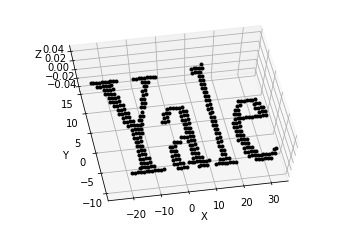

In [92]:
#remember these data?
myPlot3D( data3D, elev = 70, azim=-100)
plt.show()

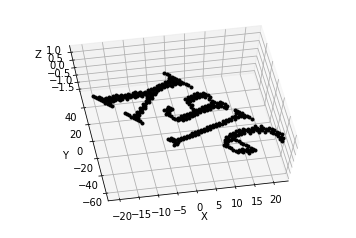

In [93]:
# lets abuse it a little bit
np.random.seed(12)
M = np.random.randn(3,3)
Z = M @ data3D
myPlot3D( Z, elev = 70, azim=-100)
plt.show()

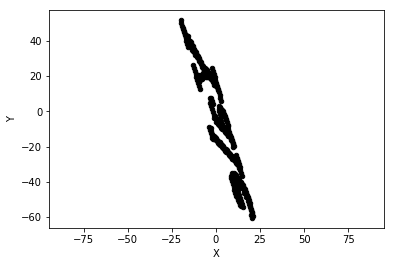

In [94]:
# Trivial "projection": keep only the first and second coordinates
myPlot2D( Z[:2,:])
plt.show()

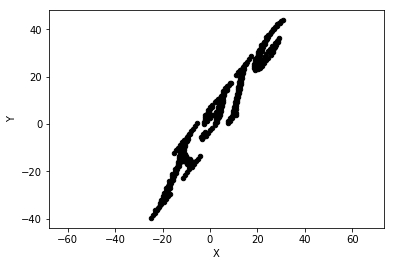

In [95]:
# "Projection" with the U we used before
myPlot2D( U.T @ Z )
plt.show()

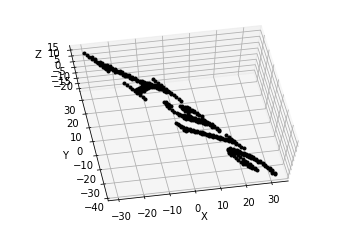

In [96]:
# But what projection literally means is
Z2 = U @ U.T @ Z # this is still data in R^3!
myPlot3D( Z2, elev = 70, azim=-100)
plt.show()

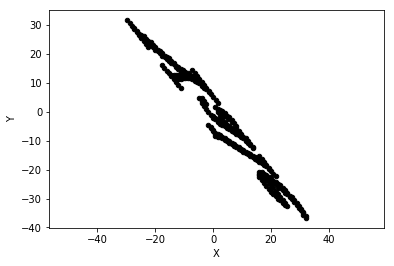

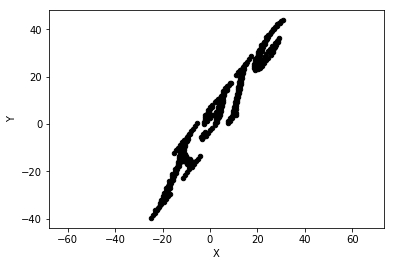

In [97]:
# The "projection" is NOT just the first two coordinates of the projection

# first two coordinates of the projection
myPlot2D( Z2[:2,:] )
plt.show()

# What we often call a "projection"
myPlot2D( U.T @ Z )
plt.show()

# What is the best "projection"?

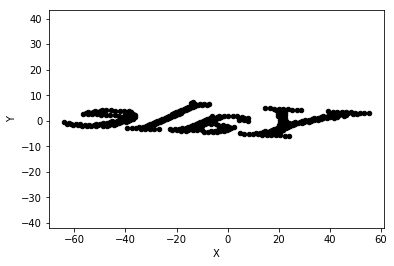

In [98]:
U,D,V = la.svd(Z)
U = U[:,:2]
Z2 = U.T @ Z
myPlot2D( Z2 )
plt.show()

Well, roughly...

This might require some more details...

Let's talk about SVD.

# Singular Value Decomposition (SVD)

Every $d \times n$ matrix has the following decomposition (Full form SVD):

\begin{equation}
    Z = U D V^*,
\end{equation}

where $U$ is a $d \times d$ unitary matrix, $V$ is a $n \times n$ unitary matrix, and 
$D$ is a $d \times n$ matrix where $D_{ij}=0$ unless $i=j$.

The elements $D_{ii} = \sigma_i$ are called *the signular values* of the matrix $Z$. They are real valued and non-negative. 

The columns of U are called the left singular vectors of $Z$ and the columns of $U$ are called the right singular vectors of $Z$.

By convension, we sort the singular values such that $\sigma_1 \geq \sigma_2 \geq ...$

Another equivalent way of writing the SVD is

\begin{equation}
    Z = \sum_{i=1}^{min(d,n)} \sigma_i u_i v_i^* ,
\end{equation}
where $u_i$ and $v_i$ are columns of $U$ and $V$.



In [99]:
np.random.seed(123)
m=2
n=3
A=np.random.rand(m,n)
print(A)

[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]]


In [100]:
U,D,V = la.svd(A)
print(U.T@U)
print(V.T@V)
print("D=",D) # Oooops, not a matrix


[[1.00000000e+00 1.73421405e-16]
 [1.73421405e-16 1.00000000e+00]]
[[ 1.00000000e+00 -6.68556092e-17  3.67791673e-18]
 [-6.68556092e-17  1.00000000e+00  5.82940292e-17]
 [ 3.67791673e-18  5.82940292e-17  1.00000000e+00]]
D= [1.23347282 0.31233647]


In [101]:
Dmat = np.zeros((m,n))
for i in range(min(m,n)):
    Dmat[i,i]=D[i]
print(Dmat)

[[1.23347282 0.         0.        ]
 [0.         0.31233647 0.        ]]


In [102]:
#print(U @ Dmat @ V.T) ### OOOOOPPPSSS! Python gives us V.T!
print(U @ Dmat @ V)  

[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]]


In [103]:
# or the other way...
myA = np.zeros((m,n))
for i in range(min(m,n)):
    myA = myA + D[i]* np.outer(U[:,i] , V[i,:])
print(myA)

[[0.69646919 0.28613933 0.22685145]
 [0.55131477 0.71946897 0.42310646]]


## wait a minute! we never even looked at V2 !!! 

Indeed, these columns are simply ignores. 
There is a "thin form of the SVD". Suppose $g=min(d,n)$:

\begin{equation}
    Z = U^{(thin)}  D^{(thin)} \left( V^{(thin)} \right)^*,
\end{equation}

where $U$ is $d \times g$, $V$ is $n \times g$ and $D$ is diagonal $g \times g$, 

Technical comment: when you work with large matrices, say $m \times n$ with a very large $n$ (e.g. many samples or many pixels in images) you really don't want to get back $n \times n$ matrices. You don't have enough RAM.
In this case you really want the thin SVD, which you can get using:

U,D,VT =np.linalg.svd(Z, ***full_matrices=False***) 


In [104]:
U,D,VT = la.svd(Z)
print(U.shape, D.shape, VT.shape)

U,D,VT = la.svd(Z,full_matrices=False)
print(U.shape, D.shape, VT.shape)

(3, 3) (3,) (366, 366)
(3, 3) (3,) (3, 366)


# What is the best projection?

Suppose we have data  $z_i \in \mathbb{R}^d$. What is the $k$ dimensional projection $P$ that is the closest to the original data?

\begin{equation}
    argmin_{P} \sum_i \| P z_i - z_i \|^2.
\end{equation}

Another way to write this if we have a matrix $Z$ with columns $z_i$:

\begin{equation}
    argmin_{P} \| P Z - Z \|_{HS}^2,
\end{equation}
where we're using the Frobenius norm for matrices: $\| A \|_{HS}^2 = \sum_{i,j} A_{ij}^2$.

It turns out that

\begin{equation}
    \left\| \sum_{i=1}^{k} \sigma_i u_i v_i^* - Z \right\|_{HS}^2 = \sum_{i=k+1}^{min(d,n)} \sigma_i ^2
\end{equation}

And the best projection one can get is by using the first $k$ singular values and singular vectors:
\begin{equation}
    \sum_{i=1}^{k} \sigma_i u_i v_i^* .
\end{equation}

This is also called the best $k$ rank approximation of the matrix.

In [105]:
# in our example:
U,D,VT = la.svd(Z)
Zproj = D[0]*np.outer(U[:,0],VT[0,:]) + D[1]*np.outer(U[:,1],VT[1,:])

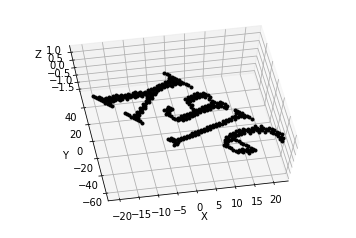

In [106]:
myPlot3D( Zproj )
plt.show()

I'm so not impressed... that's your best projection?

So, this is the best projection, but not the best "projection."

In fact in your example, the projection doesn't loose anything...

In [107]:
print(la.norm(Z-Zproj))

1.2375905933222264e-13


The reason is that the last singular value, the one we ommited happened to be zero!

In [108]:
print(D)

[5.90266043e+02 5.69038896e+01 2.11693592e-14]


So, what is the best "projection" to 2D?

let $U^{(k~ reduced)}$ be the first $k$ columns of $U$. Then our best "projection" is:

\begin{equation}
    Z_{"best"} = \left( U^{(k~ reduced)} \right)^* Z.
\end{equation}


Informally, it is the best in the sense that in minimizes the error

\begin{equation}
   \left\| U^{(k~ reduced)} Z_{"best"} - Z \right\|_{HS}.
\end{equation}

Another way to write $Z_{"best"}$:
\begin{equation}
    Z_{"best"} = D^{(k~ reduced)} V^* ,
\end{equation}

s.t
\begin{equation}
    Z_{"best"}[i,j] = \sigma_i V[i,j] .
\end{equation}




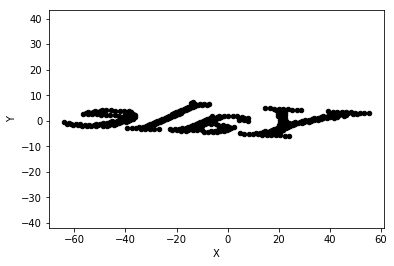

In [109]:
# code we had above:
U,D,V = la.svd(Z)
U = U[:,:2]
Z2 = U.T @ Z
myPlot2D( Z2 )
plt.show()

In [110]:
U,D,V = la.svd(Z)
( U.T @ Z)[:,0]

array([-1.34224522e+01,  7.23940107e+00,  1.69526400e-15])

# SVD and Eigendecomposition

SVD and eigendecomposition are different in many ways. For example, there are no eigenvectors defined for a matrix that isn't a square matrix, and eigenvalues can be negative or even complex valued.

Here is one of the relations though:

\begin{equation}
    AA^* = U D V^* V D^* U^* = U D D^* U^* .
\end{equation}

$A^*A$ is a symmetric matrix. Its eigenvectors are the left signular vectors of A and its eigenvalues are $\sigma_i^2$ (and zeros when we run out of singular values). 

Similarly, $A^*A$ is symmetric, and its eigenvectors are the right singular vectors of A. 

In [111]:
np.random.seed(123)
A=np.random.randn(2,3)
B=A@A.T

eigD, eigU = la.eig(B)
U,D,VT = la.svd(A)

print(eigD)
print(D**2) # they don't have to be in the same order!

[1.6253318  5.95898143]
[5.95898143 1.6253318 ]


In [112]:
print(eigU.T @ U)  # they don't have to be in the same order!


[[-1.11022302e-16  1.00000000e+00]
 [ 1.00000000e+00 -5.55111512e-17]]


In [113]:
print(eigU[:,0]@U[:,0])
print(eigU[:,0]@U[:,1])

-1.1102230246251565e-16
1.0


# Principal component analysis (PCA)

PCA is SVD.

PCA is used for unsupervised exploration of data, to find structures. This is different from the supervised learning problem in logistic regression, where we have labels and which we wish to predict.

Suppose we have *mean-zero* rows (or we set our rows to have mean zero)

In [114]:
Z.mean(axis=1)

array([ 1.78301937, -5.64619853,  0.0701986 ])

In [115]:
Z0 = Z - Z.mean(axis=1).reshape(-1,1) # Make sure you understand what I did here!
print(Z0.mean(axis=1))

[0. 0. 0.]


The weights of the first principal component is the normalized vector $v_1$ that maximizes

\begin{equation}
    argmax_{\|v\|=1} \sum_{i=1}^n <z_i, v>^2
\end{equation}

or in other words,

\begin{equation}
    argmax_{\|v\|=1} \| v^* Z \|^2 .
\end{equation}

Comment: $\|v\|=1$ restricts the vector to have norm 1.

The second principal component is the normalized vector $v_2$ that maximizes the same expression, but is also orthogonal to $v_1$ etc. 

These principal components turn out to be the left singular values!

#### The more standard way to write SVD is with mean zero COLUMNS, and principal components being the RIGHT singular vectors.

In [116]:
import sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Z.T) 
print(pca.components_[0])

U,D,V = la.svd(Z)
print(U[:,0], "a little different because Z isn't centered")
U0,D0,V0 = la.svd(Z0)
print(U0[:,0], "same as PCA!")

[-0.31361261  0.94942853 -0.01525098]
[-0.31314891  0.94958359 -0.01512478] a little different because Z isn't centered
[-0.31361261  0.94942853 -0.01525098] same as PCA!


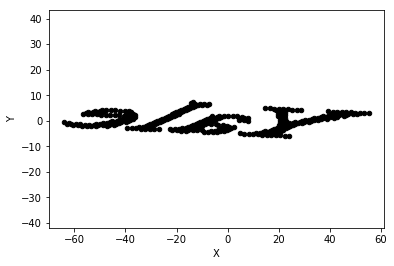

In [117]:
# A couple of ways people would normally view this:
U,D,VT = la.svd(Z0)  # note that I'm using Z0 here, which is our centered Z
U = U[:,:2]  # = Reduced U
Z2 = U.T @ Z # = Dmat_{reduced} @ V^*
myPlot2D( Z2 )
plt.show()

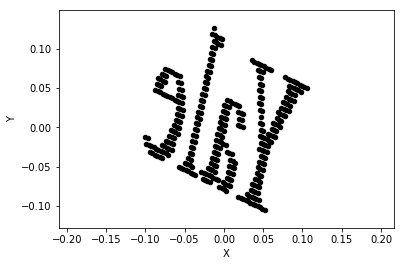

In [118]:
myPlot2D( VT ) # The components without scaling by D
plt.show()

In [119]:
# The weights, which are the left singular vectors, tell us which "directions" in the data are important 

#### PCA is SVD (on centered data)!



#### PCA is SVD (on centered data)!

It's important enought to say this again.

# Technical comments about python arrays vs. matrics


For more forml information, see https://numpy.org/devdocs/user/numpy-for-matlab-users.html


In [120]:
np.random.seed(123)
A = np.random.randn(2,2)
print( A)
B=np.matrix(A)
print( type(A), type(B) )
print("column of A:", A[:,0] )
print( "column of B:", B[:,0])


[[-1.0856306   0.99734545]
 [ 0.2829785  -1.50629471]]
<class 'numpy.ndarray'> <class 'numpy.matrix'>
column of A: [-1.0856306  0.2829785]
column of B: [[-1.0856306]
 [ 0.2829785]]


In [121]:
print("transpose column of A:", A[:,0].T )
print("transpose column of B.:", B[:,0].T)

transpose column of A: [-1.0856306  0.2829785]
transpose column of B.: [[-1.0856306  0.2829785]]


In [122]:
print(" A[:,0].T @ A[:,0] =", A[:,0].T @ A[:,0] )
print("B[:,0].T @ B[:,0]  =", B[:,0].T @ B[:,0] )

 A[:,0].T @ A[:,0] = 1.2586706371825016
B[:,0].T @ B[:,0]  = [[1.25867064]]


In [123]:
#Sacrry example:
print(" A[:,0] @ A[:,0].T =", A[:,0] @ A[:,0].T )
print("B[:,0] @ B[:,0].T  =", B[:,0] @ B[:,0].T )

 A[:,0] @ A[:,0].T = 1.2586706371825016
B[:,0] @ B[:,0].T  = [[ 1.17859381 -0.30721012]
 [-0.30721012  0.08007683]]


In [124]:
# complex conjugate
print("B.H  =", B.H )

B.H  = [[-1.0856306   0.2829785 ]
 [ 0.99734545 -1.50629471]]


In [125]:
print("A.H  =", A.H )
# ooooopppppssss

AttributeError: 'numpy.ndarray' object has no attribute 'H'

In [126]:
# matrix multiplication
print("A@A:", A@A)
print("B*B:", B*B)
print("B@B:", B@B)

A@A: [[ 1.46082112 -2.58504491]
 [-0.73345913  2.55115108]]
B*B: [[ 1.46082112 -2.58504491]
 [-0.73345913  2.55115108]]
B@B: [[ 1.46082112 -2.58504491]
 [-0.73345913  2.55115108]]


In [127]:
# elementwise
print("A*A:", A*A)
print("B.multiply(B):", np.multiply(B,B))

A*A: [[1.17859381 0.99469794]
 [0.08007683 2.26892377]]
B.multiply(B): [[1.17859381 0.99469794]
 [0.08007683 2.26892377]]


In [128]:
print("A.multiply(A):", A.multiply(A))
#### Ooooooppppppsssss....

AttributeError: 'numpy.ndarray' object has no attribute 'multiply'

In [129]:
#One of the things we shold be careful about:
v=np.random.randn(2)
u=np.matrix(v).T
Amat = np.matrix(A)
print("v=",v)
print("v.T=",v.T)
print("u=",u)
print("u.T=",u.T)


v= [-0.57860025  1.65143654]
v.T= [-0.57860025  1.65143654]
u= [[-0.57860025]
 [ 1.65143654]]
u.T= [[-0.57860025  1.65143654]]


In [130]:
print("In A@v, v is interpreted as column vector:", A@v)
print("Compare to A@u:", type(A@u), A@u)

In A@v, v is interpreted as column vector: [ 2.27519885 -2.65128156]
Compare to A@u: <class 'numpy.matrix'> [[ 2.27519885]
 [-2.65128156]]


In [131]:
print("In v @ A, v is interpreted as row vector:", v@A)
print("Compare to u.T @ A:", type(u.T @ A), u.T @ A)

In v @ A, v is interpreted as row vector: [ 1.09546717 -3.06461445]
Compare to u.T @ A: <class 'numpy.matrix'> [[ 1.09546717 -3.06461445]]


In [132]:
print("So, v @ v is dot product", v@v)
print("And v.T @ v is the same thing", v.T @ v)
print("And u.T @ u is ALMOST the same thing", u.T @ u, "   -- but, note that it is a matrix")

So, v @ v is dot product 3.062020887637484
And v.T @ v is the same thing 3.062020887637484
And u.T @ u is ALMOST the same thing [[3.06202089]]    -- but, note that it is a matrix


In [133]:
print("And v @ v.T is the same thing", v @ v.T)
print("BUT u @ u.T is NOT", u @ u.T)
print("np.outer(v,v) the outer product", np.outer(v,v))
print("np.outer(u,u) also works", np.outer(u,u))
print("np.outer(u.T,u.T) also works", np.outer(u.T,u.T))

And v @ v.T is the same thing 3.062020887637484
BUT u @ u.T is NOT [[ 0.33477825 -0.9555216 ]
 [-0.9555216   2.72724264]]
np.outer(v,v) the outer product [[ 0.33477825 -0.9555216 ]
 [-0.9555216   2.72724264]]
np.outer(u,u) also works [[ 0.33477825 -0.9555216 ]
 [-0.9555216   2.72724264]]
np.outer(u.T,u.T) also works [[ 0.33477825 -0.9555216 ]
 [-0.9555216   2.72724264]]


## Dot product vs. inner product, transpose vs. conjugate transpose

\begin{equation}
    dot(v,u) = \sum_i v[i] u[i]
\end{equation}

\begin{equation}
    <v,u> = \sum_i v[i] \overline{u[i]}
\end{equation}

Therefore,

\begin{equation}
    <v,u> =  \overline{<u,v>}
\end{equation}

These are the same for real numbers, but when we have comlex numbers thins are a little different...


Comment: physicists use the bra-ket notation that I really like...
\begin{equation}
    <v,u> =  <u|v>
\end{equation}

In [134]:
np.random.seed(123)
A=np.random.randn(2,2)+1j*np.random.randn(2,2)
Amat=np.matrix(A)
print("A=",A)
print("A.T=",A.T)
print("Amat=",Amat)
print("Amat.T=",Amat.T)

A= [[-1.0856306 -0.57860025j  0.99734545+1.65143654j]
 [ 0.2829785 -2.42667924j -1.50629471-0.42891263j]]
A.T= [[-1.0856306 -0.57860025j  0.2829785 -2.42667924j]
 [ 0.99734545+1.65143654j -1.50629471-0.42891263j]]
Amat= [[-1.0856306 -0.57860025j  0.99734545+1.65143654j]
 [ 0.2829785 -2.42667924j -1.50629471-0.42891263j]]
Amat.T= [[-1.0856306 -0.57860025j  0.2829785 -2.42667924j]
 [ 0.99734545+1.65143654j -1.50629471-0.42891263j]]


In [135]:
#print("BUT, A.H=",A.H) # not implemented
print("BUT, Amat.H=",Amat.H) # not implemented

BUT, Amat.H= [[-1.0856306 +0.57860025j  0.2829785 +2.42667924j]
 [ 0.99734545-1.65143654j -1.50629471+0.42891263j]]


In [136]:
vv=np.array([1+1j,1])
vv2 = np.array([1+0.5j,2j])
uu=np.matrix(vv).T
uu2=np.matrix(vv2).T
print(vv@vv)
print(uu.T@uu)
print(uu.H@uu)

(1+2j)
[[1.+2.j]]
[[3.+0.j]]


In [137]:
#what would you expect the inner product to be?
print(np.inner(vv,vv))
print(np.inner(uu,uu))
print(np.inner(uu.T,uu.T))

(1+2j)
[[0.+2.j 1.+1.j]
 [1.+1.j 1.+0.j]]
[[1.+2.j]]


In [138]:
#yes, python has more functions for this...
print(np.vdot(vv,vv))
# which you would think is our inner product, but looks you have to be careful with the order...
print(np.vdot(vv,vv2))
print(np.vdot(uu,uu2))
print("uu.H @ uu2 = ", uu.H @ uu2, " , uu2.H @ uu = ", uu2.H @ uu)


(3+0j)
(1.5+1.5j)
[[1.5-0.5j]]
uu.H @ uu2 =  [[1.5+1.5j]]  , uu2.H @ uu =  [[1.5-1.5j]]


In [139]:
print("uu@uu.H =",uu@uu.H)
print("uu@uu.T =", uu@uu.T)
print("np.outer(uu,uu)=", np.outer(uu,uu))

uu@uu.H = [[2.+0.j 1.+1.j]
 [1.-1.j 1.+0.j]]
uu@uu.T = [[0.+2.j 1.+1.j]
 [1.+1.j 1.+0.j]]
np.outer(uu,uu)= [[0.+2.j 1.+1.j]
 [1.+1.j 1.+0.j]]
